<a href="https://colab.research.google.com/github/shobanj/genai_assignment_level3/blob/main/GenAI_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
A company wants to predict employee productivity scores to improve workforce planning and training programs. You are hired as a Data Scientist to build a multivariate linear regression model that predicts an employee’s Productivity Score based on multiple work-related factors.
Experience (yrs),Training Hours,Working Hours,Projects
,Productivity Score
2,40,38,3,62
5,60,42,6,78
1,20,35,2,55
8,80,45,8,88
4,50,40,5,72
10,90,48,9,92
3,30,37,4,65
6,70,44,7,82
7,75,46,7,85
2,25,36,3,60
Interpretation
* Which factor most strongly impacts productivity?
* How does training affect productivity?
* Should the company increase training hours or working hours?
* What happens if Working Hours increase beyond optimal limits?
* Can productivity ever decrease with more experience?
* How would you detect overfitting in this model?
* Suggest one new feature to improve prediction accuracy.


In [ ]:
import pandas as pd
import sklearn

In [ ]:
import io

data = """Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
2,40,38,3,62
5,60,42,6,78
1,20,35,2,55
8,80,45,8,88
4,50,40,5,72
10,90,48,9,92
3,30,37,4,65
6,70,44,7,82
7,75,46,7,85
2,25,36,3,60"""

df = pd.read_csv(io.StringIO(data))
display(df.head())

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
0,2,40,38,3,62
1,5,60,42,6,78
2,1,20,35,2,55
3,8,80,45,8,88
4,4,50,40,5,72


In [ ]:
df.corr()

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
Experience (yrs),1.000000,0.969810,0.973178,0.988194,0.981991
Training Hours,0.969810,1.000000,0.993132,0.977151,0.987045
Working Hours,0.973178,0.993132,1.000000,0.974701,0.985684
Projects,0.988194,0.977151,0.974701,1.000000,0.995696
Productivity Score,0.981991,0.987045,0.985684,0.995696,1.000000


## Which factor most strongly impacts productivity?

From above correlation matrix, projects worked seems to have the highest impact (0.99) w.r.t productivity

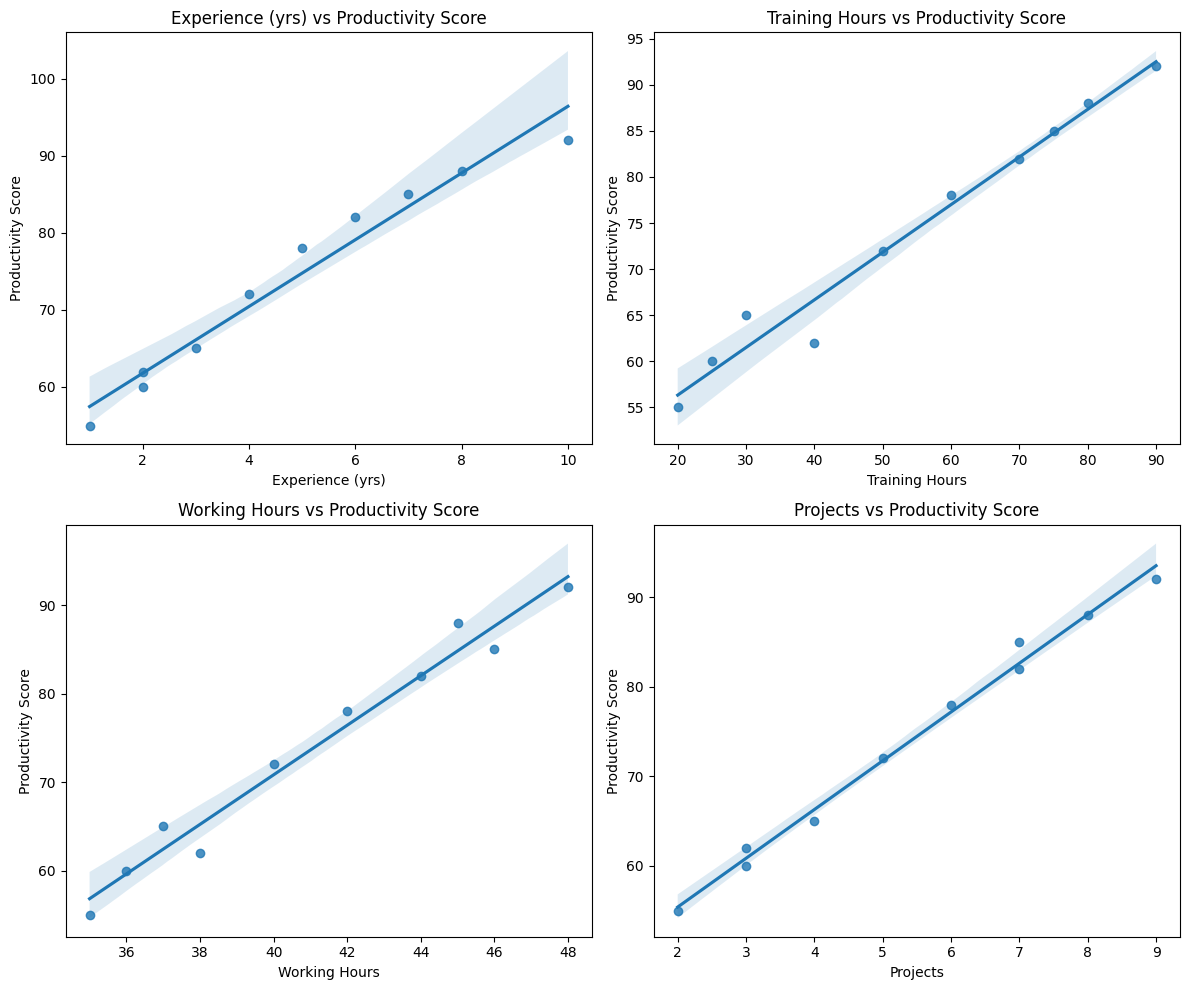

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the features to plot against 'Productivity Score'
features = ['Experience (yrs)', 'Training Hours', 'Working Hours', 'Projects']
target = 'Productivity Score'

# Calculate the number of rows and columns for the subplots
n_features = len(features)
n_cols = 2  # You can adjust this for better layout
n_rows = (n_features + n_cols - 1) // n_cols # Ceiling division

# Create the figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten the axes array for easy iteration if it's a 2D array
if n_rows > 1 and n_cols > 1:
    axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    if n_rows == 1 and n_cols == 1: # Handle case of single subplot
        ax = axes
    elif n_rows == 1 or n_cols == 1: # Handle case of 1D array of subplots
        ax = axes[i]
    else:
        ax = axes[i]

    ## sns.scatterplot(x=feature, y=target, data=df, ax=ax)
    sns.regplot(x=df[feature], y=df[target], data=df, ax=ax)

    ax.set_title(f'{feature} vs {target}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## How does training affect productivity?

Linear increase - positive correlation

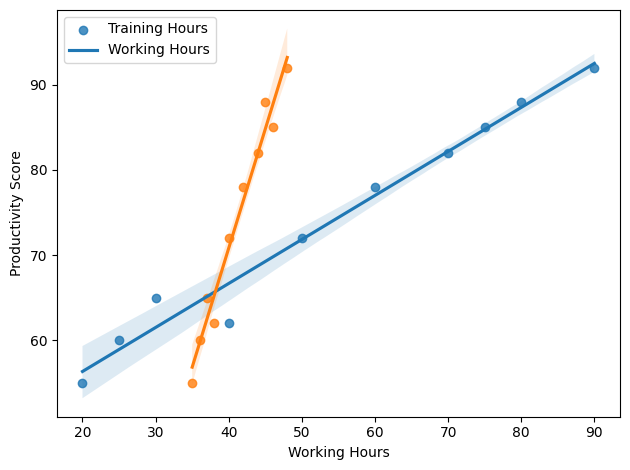

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the features to plot against 'Productivity Score'
features = ['Training Hours', 'Working Hours']
target = 'Productivity Score'

for feature in features:
  sns.regplot(x=feature, y=target, data=df)

plt.legend(features)

plt.tight_layout()
plt.show()